# ⚕Diabetes Prediction Using Machine Learning

Using the **Pima Diabetes Dataset,** I aim to build a model that predicts whether a patient has diabetes based on health metrics.

**Diabetes is a global health crisis,** with millions undiagnosed or misdiagnosed each year. Early detection can dramatically improve patient outcomes, especially in underserved communities. This project uses machine learning to predict diabetes using clinical features from the **Pima Indians dataset.** By leveraging AI, I aim to assist heathcare providers in identifying at-risk individuals faster, enabling earlier interventions and saving lives.

## 1. Setup and Imports

In [26]:
# Suppress warnings to keep output clean and focused
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Machine Learning tools for modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)


## 2. Data Loading and Inspection

In [27]:
# File path to the dataset
directory = "/content/drive/MyDrive/Project/Another_trial/diabetes.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(directory)

# Display the first five rows to preview the dataset structure and content
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Summary of the dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


📓This dataset contains **768** complete records with **9** columns including various health measurements and diabetes outcomes, all without missing values.

In [30]:
# Indentify invalid zero entries in columns wheere zero is medically impossible
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_check:
  zero_count = (df[column] == 0).sum()
  print(f"{column} has {zero_count} zero values")

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


## 3. Data Cleaning

In [31]:
# Replace invalid zeros with the median value of each column to maintain data integrity
for column in columns_to_check:
  median_value = df[column].median()
  df[column] = df[column].replace(0, median_value)

# Verify all the zeros have been successfully replaced
for column in columns_to_check:
  zero_count = (df[column] == 0).sum()
  print(f"{column} now has {zero_count} zero values (after cleaning)")

Glucose now has 0 zero values (after cleaning)
BloodPressure now has 0 zero values (after cleaning)
SkinThickness now has 0 zero values (after cleaning)
Insulin now has 0 zero values (after cleaning)
BMI now has 0 zero values (after cleaning)


## 4. Feature and Target Split

In [32]:
# Separate features (X) from target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dattaset into training (80%) and testing(20%) sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of each dataset split to verify correct partitioning
for name, data in zip(['X_train', 'y_train', 'X_test', 'y_test'],
                      [X_train, y_train, X_test, y_test]):
  print(f"{name} shape: {data.shape}")

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


## 5. Model Training & Evaluation (Base Models)

### Logistic Regression

In [33]:
# Initialize the Logistic Regression model with increased iteration limit for better convergence
model_lg = LogisticRegression(max_iter=1000)

# Train the model using the training data
model_lg.fit(X_train, y_train)

# Predict outcomes on the unseen test data
y_pred_lg = model_lg.predict(X_test)

# Evaluae the model's accuracy on the test set
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Logistic Regression Accuracy: {accuracy_lg:.2}")

Logistic Regression Accuracy: 0.76


📓The *Logistic Regression model* achieved **76% accuracy**, meaning it correctly predicted diabetes status in 3 out of 4 cases on new data

In [34]:
# Generate a detailed performance report
print(classification_report(y_test, y_pred_lg, target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.80      0.83      0.82        99
    Diabetes       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



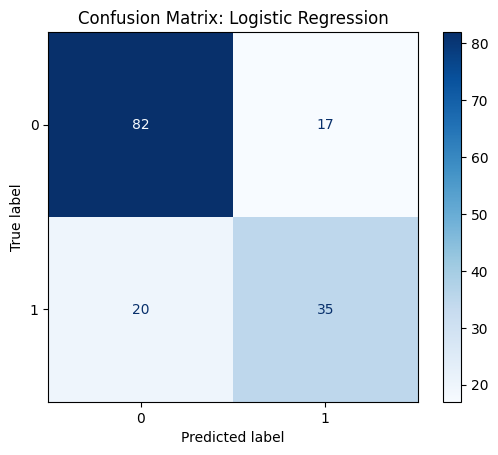

In [9]:
# Visualize the confusion matrix to show how well the model classified each class
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lg, cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression");

### Decision Tree

In [10]:
# Create model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Calculate Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2}")

Decision Tree Accuracy: 0.73


📓The *Decision Tree model* achieved **73% accuracy**, meaning it correctly predicted diabetes status 73% of the time.

In [11]:
# Classification Report
print(classification_report(
    y_test, y_pred_dt, target_names=['No Diabetes', 'Diabetes'])
)

              precision    recall  f1-score   support

 No Diabetes       0.81      0.75      0.78        99
    Diabetes       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



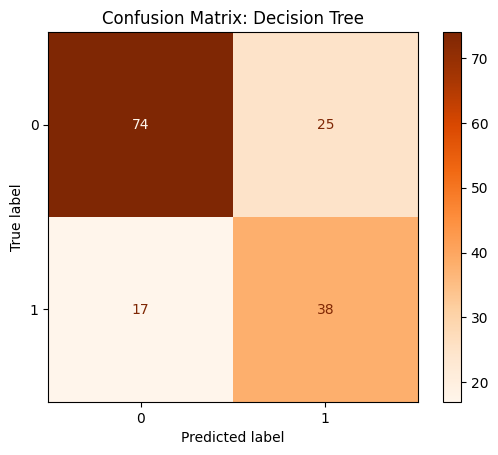

In [12]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Oranges")
plt.title("Confusion Matrix: Decision Tree");

### Random Forest

In [13]:
# Create model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2}")

Random Forest Accuracy: 0.75


📓The *Random Forest model* achieved **75% accuracy**, meaning it correctly predicted diabetes status 75% of the time.

In [14]:
# Classification Report
print(classification_report(
    y_test, y_pred_rf, target_names=['No Diabetes', 'Diabetes'])
)

              precision    recall  f1-score   support

 No Diabetes       0.81      0.80      0.81        99
    Diabetes       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



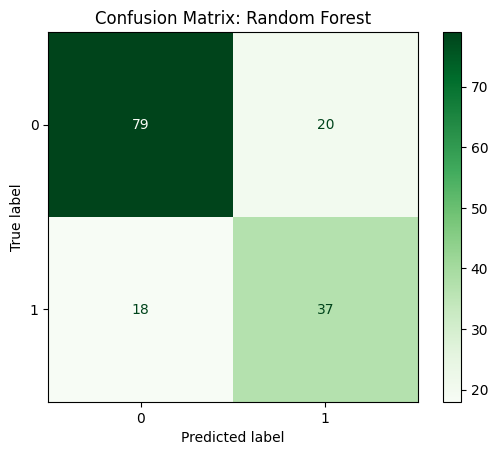

In [15]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Greens")
plt.title("Confusion Matrix: Random Forest");

## 6. Compare Metrics

In [16]:
# Metrics to extract
metrics = ['precision', 'recall', 'f1-score']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
reports = [y_pred_lg, y_pred_dt, y_pred_rf]

# Generate classification reports
report_dicts = [
    classification_report(y_test, pred, target_names=["No Diabetes", "Diabetes"], output_dict=True)
    for pred in reports
]

# Extract metrics for the 'Diabetes' class (label '1')
rows = []
for report in report_dicts:
    row = []
    for metric in metrics:
        value = report['Diabetes'][metric]  # '1' is the class label for "Diabetes"
        row.append(round(value, 2))
    rows.append(row)

# Create the DataFrame
df_metrics = pd.DataFrame(rows, columns=metrics, index=models)

# Display the table
df_metrics

,precision,recall,f1-score
Logistic Regression,0.67,0.64,0.65
Decision Tree,0.60,0.69,0.64
Random Forest,0.65,0.67,0.66


## 7. Feature Importance (Random Forest)

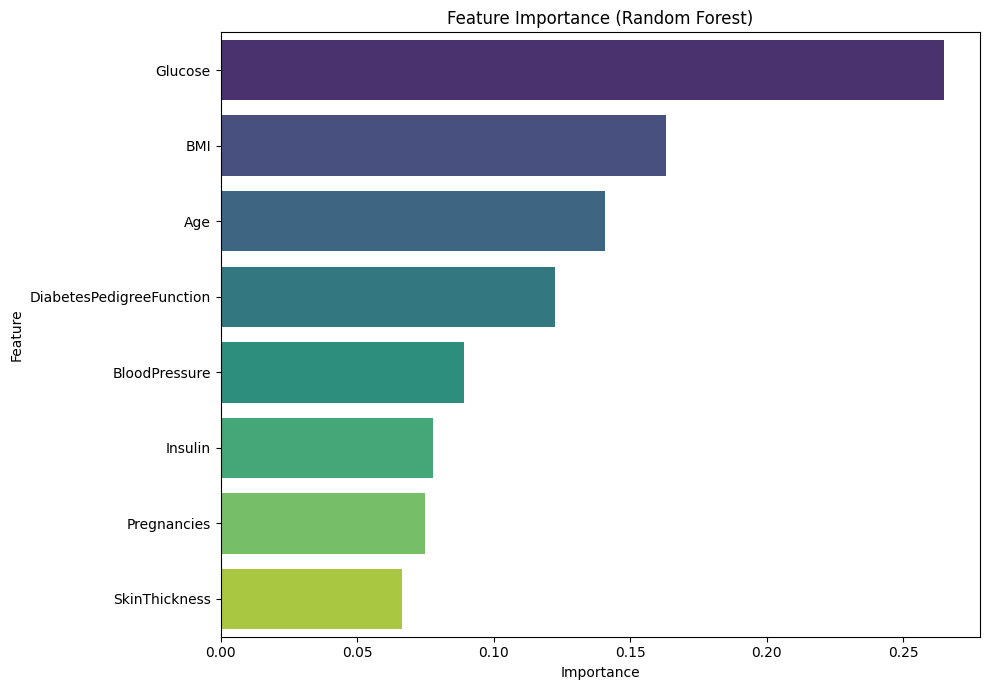

In [17]:
# Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout();

🧠 **Explanation:**
1. **Glucose**
  
  *Importance*
  - Glucose is the sugar in our blood. When it's too high, that's usually the first sign for diabetes.

  *Interpretation*
  - The model focuses on the glucose levels - as doctors do - because high blood sugar is a big sign of diabetes.

2. **BMI (Body Mass Index)**
  
  *Importance*
  - A high BMI usually means a person is overweight, putting more pressure on the body to manage sugar properly, often leading to type 2 diabetes.

  *Interpretation*
  - When the model spots a high BMI, it recognizes a major risk factor, telling us that the model is picking up on real-world patterns between weight and diabetes.

3. **Age**
  
  *Importance*
  - As people get older, their risk of diabettes naturally goes up - this is as a result of a slower metabolism and lifestyle shifts.

  *Interpretation*
  - The model includes ages because the older someone is, the more careful we must be. That makes sense for long-term risk tracking.

4. **Blood Pressure**
  
  *Importance*
  - High blood pressure often shows up alongside diabetes and makes complications like heart disease more likely.

  *Interpretation*
  - The model flags high blood pressure, which shows it's not just looking at sugar, but also watching for other health issues that often comes with it.

5. **Insulin**

  *Importance*
  - Insulin is the hormone that helps in managing blood sugar. If the levels are off, it can mean early trouble with how the body handles sugar.

  *Interpretation*
  - When the insulin levels aren't right, the model picks it up, which can help cach diabetes risk even before it fully develops.

6. **Skin Thickness**

  *Importance*
  - This is a way to estimate body fat under the skin. More fat can signal higher diabetes risk.

  *Interpretation*
  - By measuring skin thicknesss, the model ges another clue about someone's body fat, which plays a role in overall risk

7. **Pregnancies**

  *Importance*
  - Pregnancy can temporarily raise blood sugar, and women who've had gestational diabetes are more likely to get type 2 later.

  *Interpretation*
  - For women, the number of pregnancies can tell us a lot - especially if they had sugar issues during pregnancy. The model picks up on that.

8. **Diabetes Pedigree Function (Genetic Risk)**

  *Importance*
  - Some people are more likely to get diabetes just because it runs in the family.

  *Interpretation*
  - Genetics matter. If diabetes runs in someone's family, the model takes that into account, making its predictions more personal accuracte.

## 8. Improve the Logistic Regression by Scaling

In [18]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on scaled data
model_lg_scaled = LogisticRegression(max_iter=1000)

# Fit the data
model_lg_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = model_lg_scaled.predict(X_test_scaled)

print("Scaled Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_scaled, target_names=['No Diabetes', 'Diabetes']))

Scaled Logistic Regression Report:

              precision    recall  f1-score   support

 No Diabetes       0.81      0.83      0.82        99
    Diabetes       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



### 9. Hyperparameters Tuning

#### Logistic Regression Tuning

In [19]:
param_grid_lg = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search_lg = GridSearchCV(
    LogisticRegression(max_iter=1000), param_grid_lg, cv=5, scoring='f1_macro')

# Fit the data
grid_search_lg.fit(X_train_scaled, y_train)

best_lg = grid_search_lg.best_estimator_
y_pred_best_lg = best_lg.predict(X_test_scaled)

print("Tuned Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_best_lg,
                            target_names=['No Diabetes', 'Diabetes']))

Tuned Logistic Regression Report:

              precision    recall  f1-score   support

 No Diabetes       0.80      0.84      0.82        99
    Diabetes       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



#### Random Forest Tuning

In [20]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid_rf,
    cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Report:\n")
print(classification_report(y_test, y_pred_best_rf,
                            target_names=['No Diabetes', 'Diabetes']))

Tuned Random Forest Report:

              precision    recall  f1-score   support

 No Diabetes       0.82      0.80      0.81        99
    Diabetes       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



#### 10. Visual Comparison: Accuracy & F1-Score

In [21]:
# Accuracy and F1 from tuned models
lg_acc = accuracy_score(y_test, y_pred_lg)
dt_acc = accuracy_score(y_test, y_pred_dt)
rf_acc = accuracy_score(y_test, y_pred_best_rf)

f1_scores = [
    classification_report(y_test, y_pred_lg, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_best_rf, output_dict=True)['weighted avg']['f1-score']
]

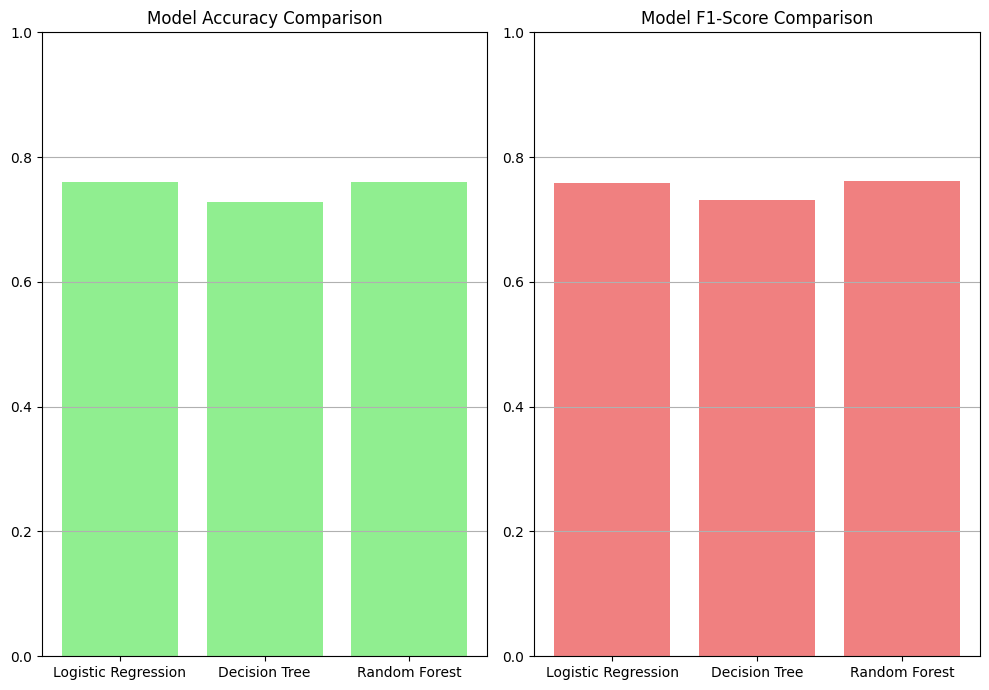

In [22]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Accuracy bar
axes[0].bar(models, [lg_acc, dt_acc, rf_acc], color='lightgreen')
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylim(0, 1)
axes[0].grid(True, axis='y')

# F1-score bar
axes[1].bar(models, f1_scores, color='lightcoral')
axes[1].set_title("Model F1-Score Comparison")
axes[1].set_ylim(0, 1)
axes[1].grid(True, axis='y')

plt.tight_layout();

### 11. Save Results

In [25]:
# Final metrics DataFrame
final_df = pd.DataFrame({
    'Model': models,
    'Accuracy': [f"{lg_acc:.2%}", f"{dt_acc:.2%}", f"{rf_acc:.2%}"],
    'F1-Score': [f"{score:.2f}" for score in f1_scores]
})

# Save as CSV
final_df.to_csv('/content/drive/MyDrive/Project/Another_trial/diabetes_worked.csv', index=False)

# Save cleaned dataseet
df.to_csv('/content/drive/MyDrive/Project/Another_trial/diabetes_cleaned_final.csv', index=False)